<a href="https://colab.research.google.com/github/youngsiiimba/predictive-maintenance/blob/main/AI4I_2020_Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI4I 2020 Predictive Maintenance

##Import data

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv

--2022-08-12 10:10:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522048 (510K) [application/x-httpd-php]
Saving to: ‘ai4i2020.csv’

ai4i2020.csv        100%[===================>] 509.81K   789KB/s    in 0.6s    

2022-08-12 10:10:52 (789 KB/s) - ‘ai4i2020.csv’ saved [522048/522048]



In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('/content/ai4i2020.csv')

##Data analysis

In [4]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

###How much data do we have ?

In [10]:
df.shape

(10000, 14)

###How many different machine states are there?

In [18]:
possible_machine_states = list(df['Machine failure'].unique())
possible_machine_states

[0, 1]

###How much of the data is when the machine was *working* ?

In [21]:
# Get all rows where machine status was working
df_status_WORKING = df[ df["Machine failure"] == 0 ]

In [22]:
nr_rows_machine_status_WORKING = df_status_WORKING.shape[0]

In [23]:
nr_rows_total = df.shape[0]

In [24]:
percent_machine_status_WORKING = \
    (nr_rows_machine_status_WORKING / nr_rows_total) * 100.0

print('The percentage of "Working" data is: ', percent_machine_status_WORKING)

The percentage of "Working" data is:  96.61


###How many times was the machine broken?

In [25]:
# Get all rows where machine status was broken
df_status_BROKEN = df[ df["Machine failure"] == 1]
df_status_BROKEN

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [29]:
print('There are ',df_status_BROKEN.shape[0],' instances where the machine was broken.')

There are  339  instances where the machine was broken.


In [30]:
nr_rows_machine_status_BROKEN = df_status_BROKEN.shape[0]

###Visualisation of when the machine broke

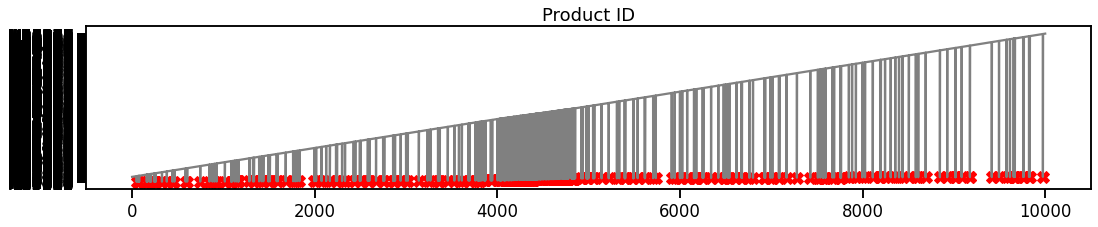

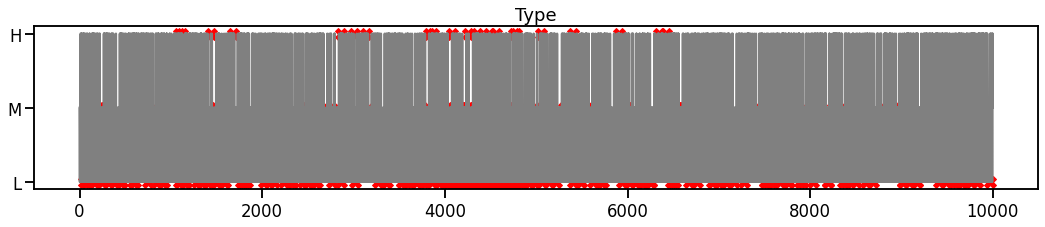

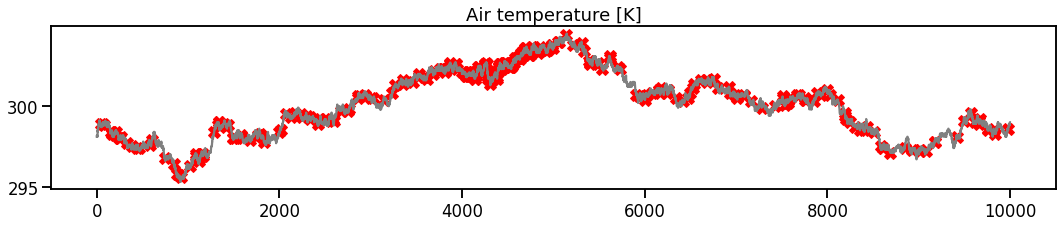

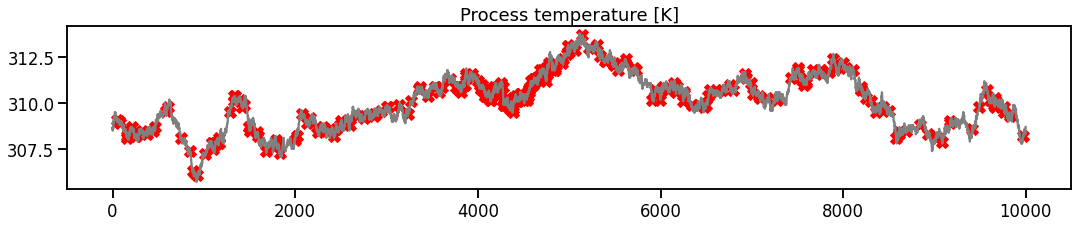

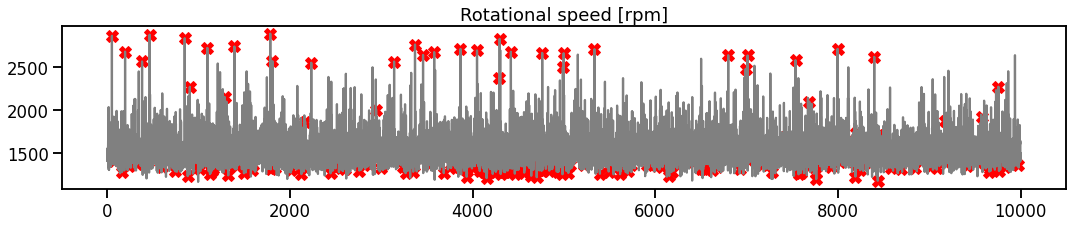

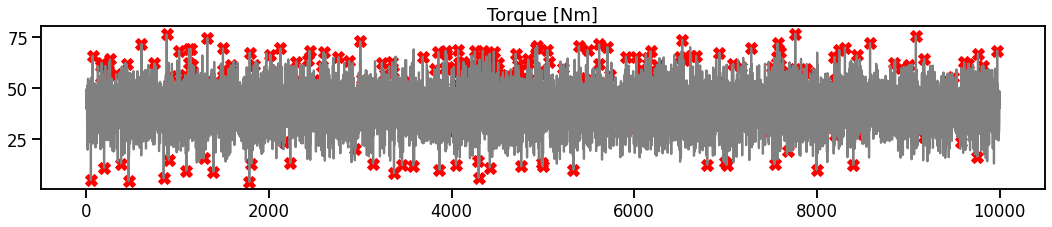

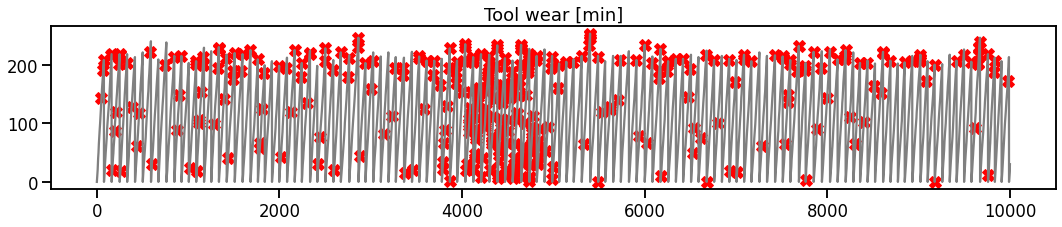

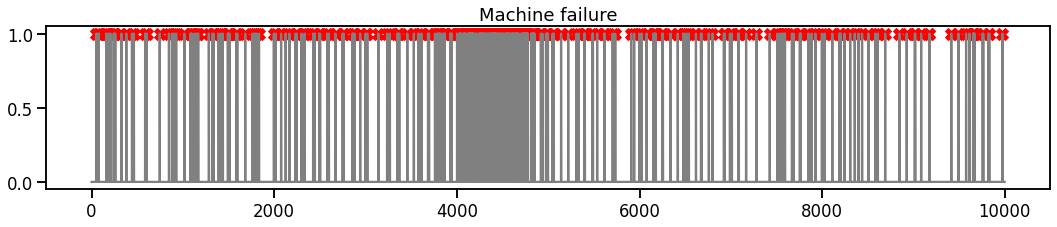

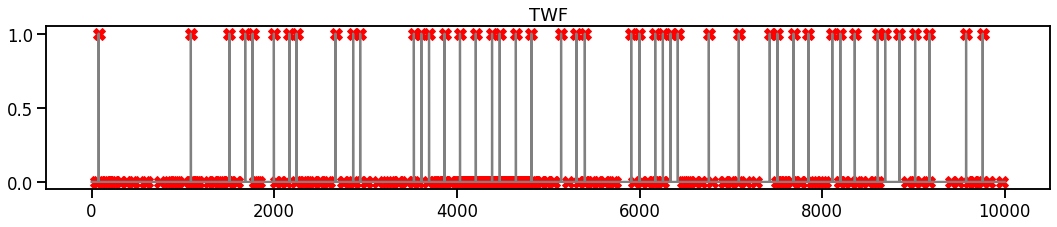

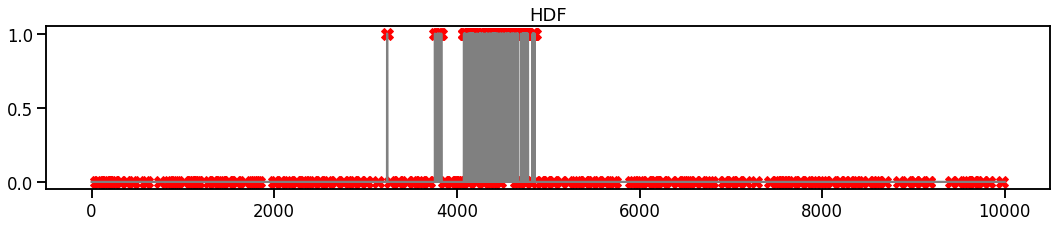

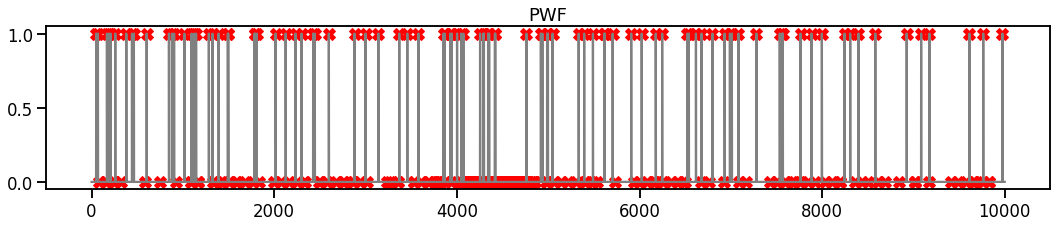

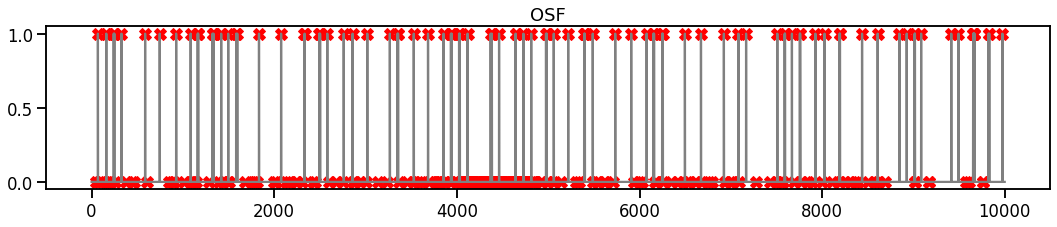

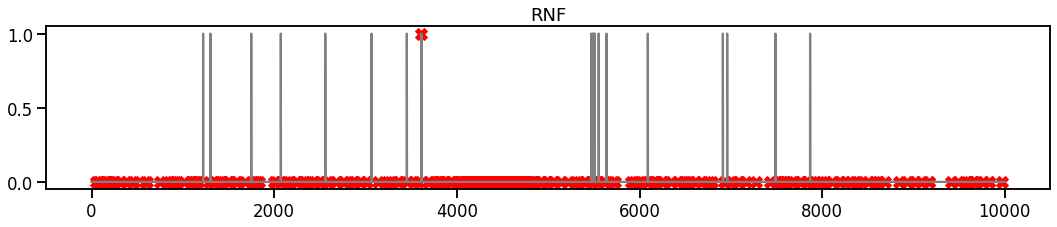

In [35]:
dfBroken = df[ df["Machine failure"] == 1]
dfSensors = df.drop(['Machine failure'], axis=1)
dfSensors = df.drop(['Product ID'], axis=1)
dfSensors = df.drop(['Type'], axis=1)
dfSensors = df.drop(['UDI'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()